In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
import functions.data_wrangling as data 
import functions.eddy_feedback as ef

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

# CanESM2 Monthly

In [34]:
can_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/CanESM5/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True)
can_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/CanESM5/Amon/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True)

can_epfy = can_epfy.sel( plev = can_ua.plev.values )

can_ds = xr.Dataset( {'ubar': can_ua.ua.mean('lon'), 'div1': can_epfy.epfy})
can_ds = can_ds.rename({'plev': 'level'})
can_ds['level'] = can_ds['level'] / 100

# take DJF mean
can_ds = data.seasonal_dataset(can_ds)
can_ds = can_ds.mean('time')
can_ds = can_ds.sel( lat=slice(0,90) )
can_ds

<xarray.Dataset>
Dimensions:  (level: 19, lat: 32, ens_ax: 300)
Coordinates:
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float64 1.395 4.186 6.977 9.767 ... 79.53 82.31 85.1 87.86
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, level, lat) float32 dask.array<chunksize=(1, 19, 32), meta=np.ndarray>
    div1     (ens_ax, level, lat) float32 dask.array<chunksize=(1, 19, 32), meta=np.ndarray>

In [35]:
print('Calculating NH EFP...')
corr_nh = xr.corr(can_ds.div1, can_ds.ubar, dim='ens_ax').load()

print(f'canESM ubar has NaN: {np.any(np.isnan(can_ds.ubar.values))}')
print(f'canESM div1 has NaN: {np.any(np.isnan(can_ds.div1.values))}')

Calculating NH EFP...
canESM ubar has NaN: False
canESM div1 has NaN: False


In [36]:
# find boolean
is_nan_can = np.isnan(can_ds.div1)
is_nan_can = is_nan_can.mean('ens_ax')
is_nan_can

<xarray.DataArray 'div1' (level: 19, lat: 32)>
dask.array<mean_agg-aggregate, shape=(19, 32), dtype=float64, chunksize=(19, 32), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float64 1.395 4.186 6.977 9.767 ... 79.53 82.31 85.1 87.86

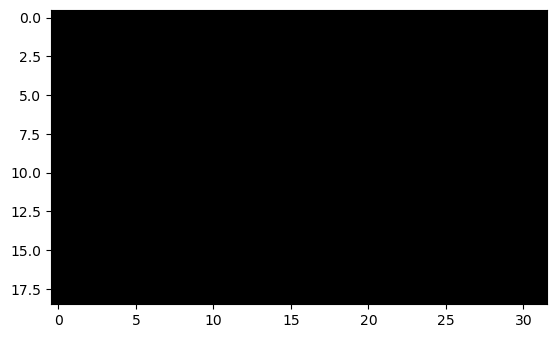

In [37]:
plt.imshow(is_nan_can.values, cmap='gray')

# MIROC6 Monthly

In [38]:
# import files
miroc_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/MIROC6/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True)
miroc_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/MIROC6/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True)

# make into dataset
miroc_epfy = miroc_epfy.sel( plev = miroc_ua.plev.values )
miroc_ds = xr.Dataset( {'ubar': miroc_ua.ua.mean('lon'), 'div1': miroc_epfy.epfy})
miroc_ds = miroc_ds.rename({'plev': 'level'})
miroc_ds['level'] = miroc_ds['level'] / 100

# take DJF mean
miroc_ds = data.seasonal_dataset(miroc_ds)
miroc_ds = miroc_ds.mean('time')
miroc_ds = miroc_ds.sel( lat=slice(0,90) )

miroc_ds

<xarray.Dataset>
Dimensions:  (level: 19, lat: 64, ens_ax: 100)
Coordinates:
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float64 0.7004 2.101 3.502 4.903 ... 84.74 86.14 87.54 88.93
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, level, lat) float32 dask.array<chunksize=(1, 19, 64), meta=np.ndarray>
    div1     (ens_ax, level, lat) float32 dask.array<chunksize=(1, 19, 64), meta=np.ndarray>

In [39]:
print('Calculating NH EFP...')
corr_nh = xr.corr(miroc_ds.div1, miroc_ds.ubar, dim='ens_ax').load()

print(f'MIROC6 ubar has NaN: {np.any(np.isnan(miroc_ds.ubar.values))}')
print(f'MIROC6 div1 has NaN: {np.any(np.isnan(miroc_ds.div1.values))}')

Calculating NH EFP...
MIROC6 ubar has NaN: False
MIROC6 div1 has NaN: True


In [40]:
# find boolean
is_nan_miroc = np.isnan(miroc_ds.div1)
is_nan_miroc = is_nan_miroc.mean('ens_ax')
is_nan_miroc

<xarray.DataArray 'div1' (level: 19, lat: 64)>
dask.array<mean_agg-aggregate, shape=(19, 64), dtype=float64, chunksize=(19, 64), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float64 0.7004 2.101 3.502 4.903 ... 84.74 86.14 87.54 88.93

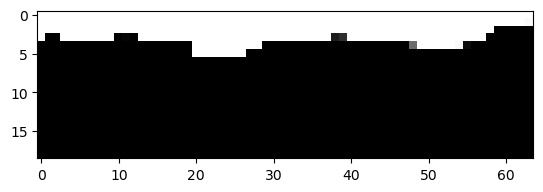

In [41]:
plt.imshow(is_nan_miroc.values, cmap='gray')

In [42]:
# missing_coords = []

# for level in range(len(is_nan_miroc['level'])):
#     for lat in range(len(is_nan_miroc['lat'])):
#         # print((level, lat))
        
#         # check if entry is True
#         if is_nan_miroc.values[level, lat]:
#             # If true, save coordinates 
#             missing_coords.append( (is_nan_miroc[level,lat].level.values, is_nan_miroc[level,lat].lat.values) )
            
# print(f'Number of NaNs: {len(missing_coords)} \nTotal number: {len(is_nan_miroc.level)*len(is_nan_miroc.lat)}')

# missing_coords

### Subset pressure level

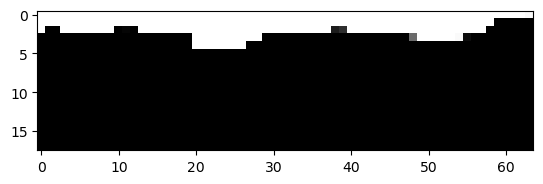

In [43]:
is_nan_miroc2 = is_nan_miroc.where( is_nan_miroc.level < 1000., drop=True)

plt.imshow(is_nan_miroc2.values, cmap='gray')

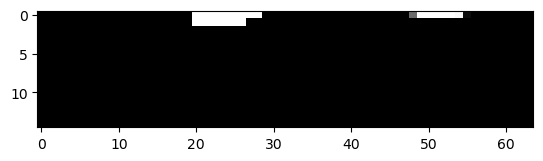

In [44]:
is_nan_miroc3 = is_nan_miroc.where( is_nan_miroc.level < 700., drop=True)

plt.imshow(is_nan_miroc3.values, cmap='gray')

In [45]:
missing_coords = []

for level in range(len(is_nan_miroc3['level'])):
    for lat in range(len(is_nan_miroc3['lat'])):
        # print((level, lat))
        
        # check if entry is True
        if is_nan_miroc3.values[level, lat]:
            # If true, save coordinates 
            missing_coords.append( (is_nan_miroc3[level,lat].level.values, is_nan_miroc3[level,lat].lat.values) )
            
print(f'Number of NaNs: {len(missing_coords)} \nTotal number: {len(is_nan_miroc3.level)*len(is_nan_miroc3.lat)}')

missing_coords

Number of NaNs: 24 
Total number: 960


[(array(600.), array(28.7157157)),
 (array(600.), array(30.11647993)),
 (array(600.), array(31.51724377)),
 (array(600.), array(32.91800716)),
 (array(600.), array(34.31877008)),
 (array(600.), array(35.71953248)),
 (array(600.), array(37.12029431)),
 (array(600.), array(38.52105553)),
 (array(600.), array(39.92181607)),
 (array(600.), array(67.9366733)),
 (array(600.), array(69.33737157)),
 (array(600.), array(70.73805877)),
 (array(600.), array(72.13873229)),
 (array(600.), array(73.53938863)),
 (array(600.), array(74.94002302)),
 (array(600.), array(76.3406287)),
 (array(600.), array(77.74119587)),
 (array(500.), array(28.7157157)),
 (array(500.), array(30.11647993)),
 (array(500.), array(31.51724377)),
 (array(500.), array(32.91800716)),
 (array(500.), array(34.31877008)),
 (array(500.), array(35.71953248)),
 (array(500.), array(37.12029431))]

# NorESM2-LM

In [46]:
nor_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/NorESM2-LM/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True)
nor_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/NorESM2-LM/Amon/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True, chunks={'time':12})

nor_epfy = nor_epfy.sel( plev = nor_ua.plev.values )

nor_ds = xr.Dataset( {'ubar': nor_ua.ua.mean('lon'), 'div1': nor_epfy.epfy})
nor_ds = nor_ds.rename({'plev': 'level'})
nor_ds['level'] = nor_ds['level'] / 100

# take DJF mean
nor_ds = data.seasonal_dataset(nor_ds)
nor_ds = nor_ds.mean('time')
nor_ds = nor_ds.sel( lat=slice(0,90) )
nor_ds

<xarray.Dataset>
Dimensions:  (level: 19, lat: 48, ens_ax: 200)
Coordinates:
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float64 0.9474 2.842 4.737 6.632 ... 84.32 86.21 88.11 90.0
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, level, lat) float32 dask.array<chunksize=(1, 19, 48), meta=np.ndarray>
    div1     (ens_ax, level, lat) float32 dask.array<chunksize=(1, 19, 48), meta=np.ndarray>

In [47]:
print('Calculating NH EFP...')
corr_nh = xr.corr(nor_ds.div1, nor_ds.ubar, dim='ens_ax').load()

print(f'NorESM ubar has NaN: {np.any(np.isnan(nor_ds.ubar.values))}')
print(f'NorESM div1 has NaN: {np.any(np.isnan(nor_ds.div1.values))}')

Calculating NH EFP...


/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


NorESM ubar has NaN: False
NorESM div1 has NaN: False


In [48]:
# find boolean
is_nan_nor = np.isnan(nor_ds.div1)
is_nan_nor = is_nan_nor.mean('ens_ax')
is_nan_nor

<xarray.DataArray 'div1' (level: 19, lat: 48)>
dask.array<mean_agg-aggregate, shape=(19, 48), dtype=float64, chunksize=(19, 48), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float64 0.9474 2.842 4.737 6.632 ... 84.32 86.21 88.11 90.0

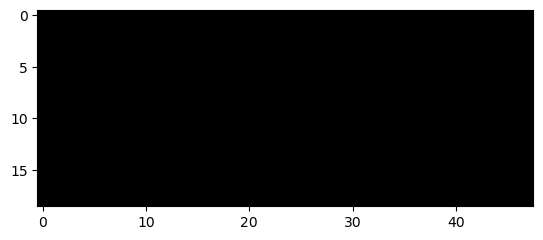

In [49]:
plt.imshow(is_nan_nor.values, cmap='gray')

# Reanalysis NaN match

In [50]:
# pull in files
ep_fluxes = xr.open_mfdataset('/badc/srip/data/zonal/common_grid/jra_55/TEM_monthly*')
ucomp = xr.open_mfdataset('/badc/srip/data/zonal/common_grid/jra_55/ZMD_monthly*')

# create subset of data and calculate seasonal mean
srip_jra = xr.Dataset( {'EPF_phi_pr': ep_fluxes['EPF_phi_pr'], 'EPFD_phi_pr': ep_fluxes['EPFD_phi_pr'], 'ubar': ucomp.u } )
srip_jra

<xarray.Dataset>
Dimensions:      (time: 708, pressure: 22, latitude: 73)
Coordinates:
  * time         (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:...
  * pressure     (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude     (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
Data variables:
    EPF_phi_pr   (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 73), meta=np.ndarray>
    EPFD_phi_pr  (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 73), meta=np.ndarray>
    ubar         (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 73), meta=np.ndarray>

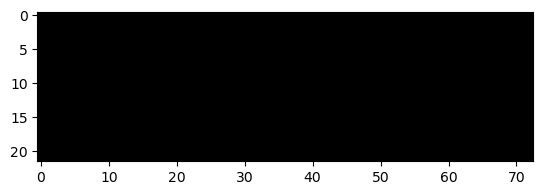

In [51]:
isnan_srip = np.isnan(srip_jra.ubar)
isnan_srip = isnan_srip.mean('time')
plt.imshow(isnan_srip.values, cmap='gray')

100%|██████████| 22/22 [59:30<00:00, 162.31s/it]


Number of NaNs: 186 
Total number: 1606


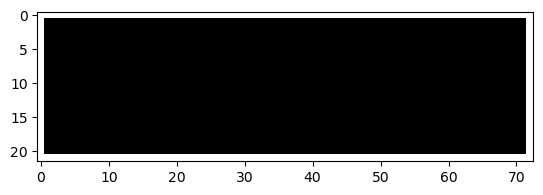

In [52]:
isnan_srip = np.isnan(srip_jra.EPF_phi_pr)
isnan_srip = isnan_srip.mean('time')

from tqdm import tqdm

missing_coords = []
for pressure in tqdm(range(len(isnan_srip['pressure']))):
    for latitude in tqdm(range(len(isnan_srip['latitude']))):
        # check if entry is True
        if isnan_srip.values[pressure, latitude]:
            # If true, save coordinates 
            missing_coords.append( (isnan_srip[pressure,latitude].pressure.values, isnan_srip[pressure,latitude].latitude.values) )
print(f'Number of NaNs: {len(missing_coords)} \nTotal number: {len(isnan_srip.pressure)*len(isnan_srip.latitude)}')

plt.imshow(isnan_srip.values, cmap='gray')

Number of NaNs: 226 
Total number: 1606


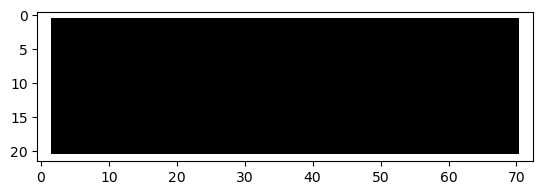

In [53]:
isnan_srip = np.isnan(srip_jra.EPFD_phi_pr)
isnan_srip = isnan_srip.mean('time')

missing_coords2 = []
for pressure in range(len(isnan_srip['pressure'])):
    for latitude in range(len(isnan_srip['latitude'])):        
        # check if entry is True
        if isnan_srip.values[pressure, latitude]:
            # If true, save coordinates 
            missing_coords2.append( (isnan_srip[pressure,latitude].pressure.values, isnan_srip[pressure,latitude].latitude.values) )
print(f'Number of NaNs: {len(missing_coords2)} \nTotal number: {len(isnan_srip.pressure)*len(isnan_srip.latitude)}')

plt.imshow(isnan_srip.values, cmap='gray')

In [54]:
missing_coords

[(array(1000., dtype=float32), array(-90., dtype=float32)),
 (array(1000., dtype=float32), array(-87.5, dtype=float32)),
 (array(1000., dtype=float32), array(-85., dtype=float32)),
 (array(1000., dtype=float32), array(-82.5, dtype=float32)),
 (array(1000., dtype=float32), array(-80., dtype=float32)),
 (array(1000., dtype=float32), array(-77.5, dtype=float32)),
 (array(1000., dtype=float32), array(-75., dtype=float32)),
 (array(1000., dtype=float32), array(-72.5, dtype=float32)),
 (array(1000., dtype=float32), array(-70., dtype=float32)),
 (array(1000., dtype=float32), array(-67.5, dtype=float32)),
 (array(1000., dtype=float32), array(-65., dtype=float32)),
 (array(1000., dtype=float32), array(-62.5, dtype=float32)),
 (array(1000., dtype=float32), array(-60., dtype=float32)),
 (array(1000., dtype=float32), array(-57.5, dtype=float32)),
 (array(1000., dtype=float32), array(-55., dtype=float32)),
 (array(1000., dtype=float32), array(-52.5, dtype=float32)),
 (array(1000., dtype=float32), a

In [55]:
missing_coords2

[(array(1000., dtype=float32), array(-90., dtype=float32)),
 (array(1000., dtype=float32), array(-87.5, dtype=float32)),
 (array(1000., dtype=float32), array(-85., dtype=float32)),
 (array(1000., dtype=float32), array(-82.5, dtype=float32)),
 (array(1000., dtype=float32), array(-80., dtype=float32)),
 (array(1000., dtype=float32), array(-77.5, dtype=float32)),
 (array(1000., dtype=float32), array(-75., dtype=float32)),
 (array(1000., dtype=float32), array(-72.5, dtype=float32)),
 (array(1000., dtype=float32), array(-70., dtype=float32)),
 (array(1000., dtype=float32), array(-67.5, dtype=float32)),
 (array(1000., dtype=float32), array(-65., dtype=float32)),
 (array(1000., dtype=float32), array(-62.5, dtype=float32)),
 (array(1000., dtype=float32), array(-60., dtype=float32)),
 (array(1000., dtype=float32), array(-57.5, dtype=float32)),
 (array(1000., dtype=float32), array(-55., dtype=float32)),
 (array(1000., dtype=float32), array(-52.5, dtype=float32)),
 (array(1000., dtype=float32), a